In [1]:
# load libraries

# install.packages("tm")
# install.packages("wordcloud") # word-cloud generator 
# install.packages("RColorBrewer") # color palettes
library(twitteR)
library(RMySQL)
library(ggmap)
library(maptools)
library(maps)
library(shiny)
library(stringi)
library(tm)
library(wordcloud)
library(RColorBrewer)

Loading required package: DBI
Loading required package: ggplot2
Loading required package: sp
Checking rgeos availability: FALSE
 	Note: when rgeos is not available, polygon geometry 	computations in maptools depend on gpclib,
 	which has a restricted licence. It is disabled by default;
 	to enable gpclib, type gpclibPermit()
Loading required package: NLP

Attaching package: ‘NLP’

The following object is masked from ‘package:ggplot2’:

    annotate

Loading required package: RColorBrewer


In [2]:
# authenticate twitter api

setup_twitter_oauth("IqXBbuoo7e4KPTz5zaselsOxX", "mzqdTv2pEmlWAhw3t05caF8TBwhHIKUkxHAyvXEkX4tAx0CYte", 
                    "528707786-TWf9LWsGnveVFdmZEsEVC1QKO6fLNluBdXgUlmvU", "PUt70tjC71FLujjFyui2wWOY2rYT0tZgh2djRh2GUalnJ")

[1] "Using direct authentication"


In [3]:
# register db for storing

register_mysql_backend(db_name = "DIC", host = "localhost", user = "root", password = "root")

In [4]:
# connect to db

mydb = dbConnect(MySQL(), user='root', password='root', dbname='DIC', host='localhost')

In [ ]:
# connect to twitter and fetch tweets till 20000 are found
# store these tweets in the database

search_twitter_and_store(searchString = "#UCL", table_name = "Soccer")
repeat{
    count = fetch(dbSendQuery(mydb, "SELECT count(*) from Tweets"))[[1]][1]
    if(count > 4000) break
    search_twitter_and_store(searchString = "#UCL", table_name = "Soccer")
}

In [5]:
# list tables

dbListTables(mydb)

[1] "Soccer" "Test"   "Tweets" "Users"

In [37]:
tweets = fetch(dbSendQuery(mydb, "SELECT text from Soccer"),n=-1)

In [38]:
docs <- Corpus(VectorSource(tweets$text))

In [39]:
docs <- tm_map(docs, content_transformer(stri_unescape_unicode))
# Convert the text to lower case
# docs <- tm_map(docs, tolower)
# Remove numbers
docs <- tm_map(docs, removeNumbers)
# Remove english common stopwords
docs <- tm_map(docs, removeWords, stopwords("english"))
# Remove your own stop word
# specify your stopwords as a character vector
docs <- tm_map(docs, removeWords, c("RT")) 
# Remove punctuations
# docs <- tm_map(docs, removePunctuation)
# Eliminate extra white spaces
docs <- tm_map(docs, stripWhitespace)

In [41]:
fileConn<-file("input/tweets.txt")
lines <- c()
for(i in 1:length(docs)){
    line <- unlist(docs[i])[[1]]
    line <- paste((regmatches(line,gregexpr("[#|@](\\d|\\w)+",line)))[[1]], collapse = " ")
    lines <- c(lines,line)
}
writeLines(lines,fileConn)
close(fileConn)

In [ ]:
# RUN THE MAP REDUCE TO GENERATE THE FILES

In [42]:
results <- read.table("output/part-00000",sep="\t")

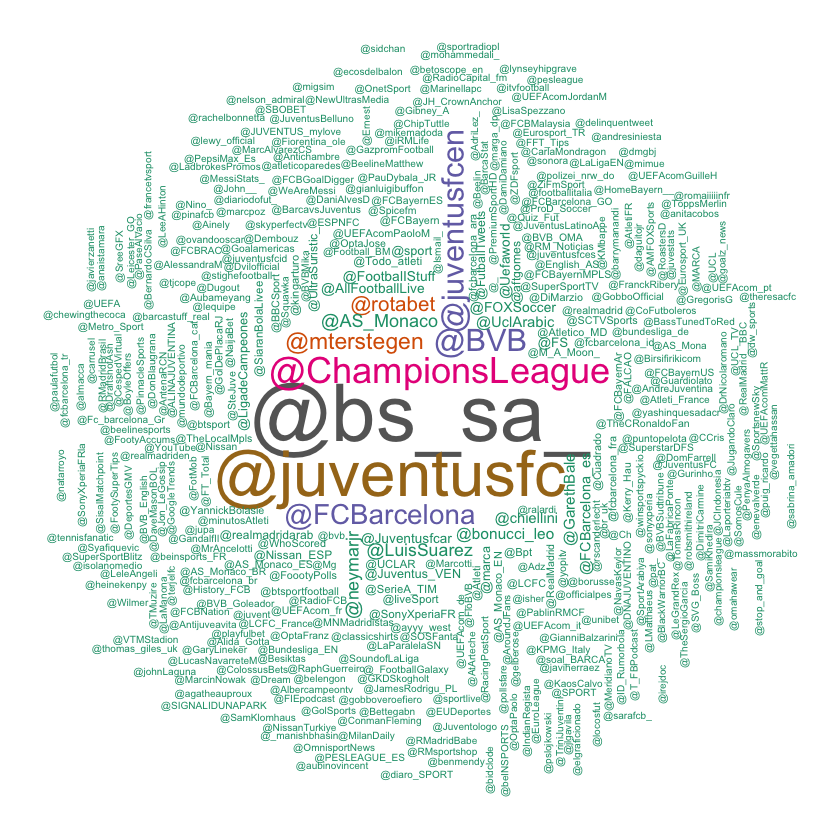

In [46]:
set.seed(1234)
wordcloud(words = results$V1, freq = results$V2, min.freq = 1,
          max.words=400, random.order=FALSE, rot.per=0.35, 
          colors=brewer.pal(8, "Dark2"))